# Simulations numériques du rapport du COR de Juin 2019 - Calcul de pension annuelle (brut)

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.EtudeImpact import EtudeImpact
import pylab as pl
import numpy as np

In [2]:
simulateur = SimulateurRetraites()

## Calcul du PIB

In [3]:
def genereTrajectoirePIB(simulateur):
    # Historique de PIBs (Milliards EUR)
    PIB_constate = {
    2005 : 1772.0, 
    2006 : 1853.3, 
    2007 : 1945.7, 
    2008 : 1995.8, 
    2009 : 1939.0, 
    2010 : 1998.5, 
    2011 : 2059.3, 
    2012 : 2091.1, 
    2013 : 2115.7, 
    2014 : 2141.1, 
    2015 : 2181.1, 
    2016 : 2228.9, 
    2017 : 2291.7, 
    2018 : 2353.1
    }
    # Croissance en fonction du scénario
    scenario_croissance = [0.0, 1.8, 1.5, 1.3, 1.0, 1.8, 1.0] 
    annee_dernier_PIB = 2018
    # Génère la trajectoire
    PIB = dict()
    for s in simulateur.scenarios:
        PIB[s] = dict()
        croissance = scenario_croissance[s]
        for a in simulateur.annees:
            if (a<= annee_dernier_PIB):
                PIB[s][a] = PIB_constate[a]
            else:
                PIB[s][a] = (1.0 + croissance/100.0) * PIB[s][a - 1]
    return PIB

In [4]:
PIB = genereTrajectoirePIB(simulateur)

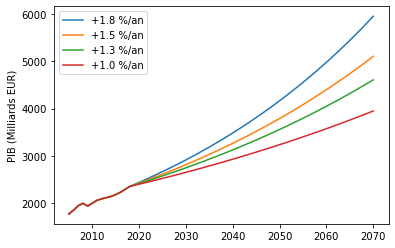

In [5]:
scenario_croissance = [1.8, 1.5, 1.3, 1.0, 1.8, 1.0] 
for s in range(0,4):
    titre = "+%s %%/an" % (scenario_croissance[s])
    y = [PIB[s+1][a] for a in simulateur.annees]
    pl.plot(simulateur.annees, y, label = titre)
pl.ylabel("PIB (Milliards EUR)")
pl.legend();

## Calcul de la pension annuelle

In [6]:
def calculePensionAnnuelleDroitDirect(simulateur, analyse, PIB):
    """
    Calcule l'historique des pensions annuelles de droit direct (brut) en kEUR.
    """
    pension_brut = dict()
    for s in analyse.scenarios:
        pension_brut[s] = dict()
        for a in analyse.annees:
            GdA = simulateur.G[s][a] * ( analyse.A[s][a] - simulateur.A[s][a] )
            pension_brut[s][a] = simulateur.B[s][a] * analyse.P[s][a] * PIB[s][a] * 1000.0 / (simulateur.NC[s][a] + 0.5 * GdA)
    return pension_brut

## Comparaison avec d'autres documents

Source : Les retraités et les retraites, Edition 2017, Panoramas de la DREES

![Pension mensuelle moyenne brute (DREES, 2017)](DREES-2017-Pension-par-retraite.png)


In [7]:
donnees_DREES_2017_totale = {
    2004 : 1188,
    2005 : 1224,
    2006 : 1262,
    2007 : 1300,
    2008 : 1343,
    2009 : 1366,
    2010 : 1392,
    2011 : 1432, 
    2012 : 1462, 
    2013 : 1492, 
    2014 : 1508,
    2015 : 1520
}

In [8]:
def extraitAnneesPensions(donnees):
    """Extrait les années et les pensions 
    d'un dictionnaire (année, pension).
    """
    annees = []
    pensions = []
    for a in donnees.keys():
        annees.append(int(a))
        pensions.append(donnees[a])
    return annees, pensions

In [9]:
donnees_annees_DREES, donnees_pensions_DREES = extraitAnneesPensions(donnees_DREES_2017_totale)

In [10]:
analyse_COR = simulateur.pilotageCOR()

In [11]:
pension_brutDirect_COR = calculePensionAnnuelleDroitDirect(simulateur, analyse_COR, PIB )

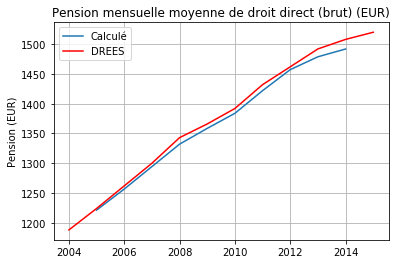

In [12]:
annees = range(2005,2015)
titre = "Calculé"
s = 1 # Le passé est le même dans tous les scénarios
y = [pension_brutDirect_COR[s][a]*1000.0/12.0 for a in annees]
pl.plot(annees, y, label = titre)
pl.plot(donnees_annees_DREES, donnees_pensions_DREES, "r-", label = "DREES")
pl.title("Pension mensuelle moyenne de droit direct (brut) (EUR)")
pl.ylabel("Pension (EUR)")
pl.grid()
pl.legend();

## Projection COR

In [13]:
pension_brut_COR = calculePensionAnnuelleDroitDirect(simulateur, analyse_COR, PIB )

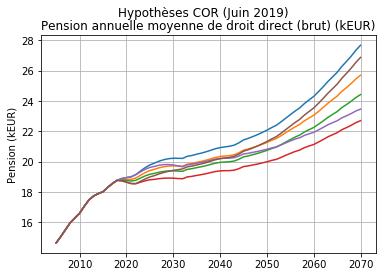

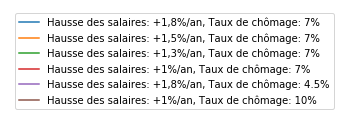

In [14]:
pl.suptitle("Hypothèses COR (Juin 2019)")
pl.title("Pension annuelle moyenne de droit direct (brut) (kEUR)")
for s in simulateur.scenarios:
    y = [pension_brutDirect_COR[s][a] for a in analyse_COR.annees]
    pl.plot(analyse_COR.annees, y)
pl.ylabel("Pension (kEUR)")
pl.grid()
analyse_COR.dessineLegende()

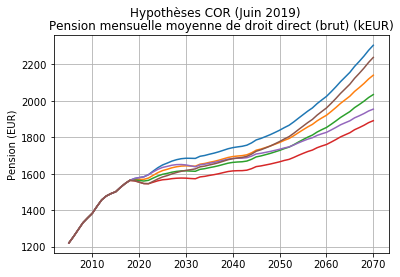

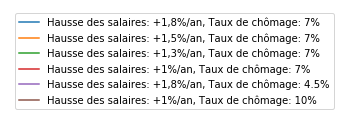

In [15]:
pl.suptitle("Hypothèses COR (Juin 2019)")
pl.title("Pension mensuelle moyenne de droit direct (brut) (kEUR)")
for s in simulateur.scenarios:
    y = [pension_brut_COR[s][a]*1000.0/12.0 for a in analyse_COR.annees]
    pl.plot(analyse_COR.annees, y)
pl.ylabel("Pension (EUR)")
pl.grid()
analyse_COR.dessineLegende()

## Projection étude d'impact

In [16]:
etudeImpact = EtudeImpact(simulateur)
analyse_EI = etudeImpact.calcule()
pension_brut_EI = calculePensionAnnuelleDroitDirect(simulateur, analyse_EI, PIB )

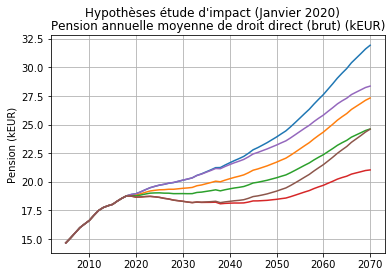

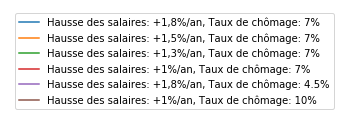

In [17]:
pl.suptitle("Hypothèses étude d'impact (Janvier 2020)")
pl.title("Pension annuelle moyenne de droit direct (brut) (kEUR)")
for s in simulateur.scenarios:
    y = [pension_brut_EI[s][a] for a in analyse_EI.annees]
    pl.plot(analyse_EI.annees, y)
pl.ylabel("Pension (kEUR)")
pl.grid()
pl.savefig("../Article4/Simulation-pension-annuelle-moyenne.pdf")
analyse_COR.dessineLegende()

## Comparaison COR et étude d'impact

Pour faciliter la comparaison avec l'étude d'impact, nous utilisons les mêmes couleurs. 

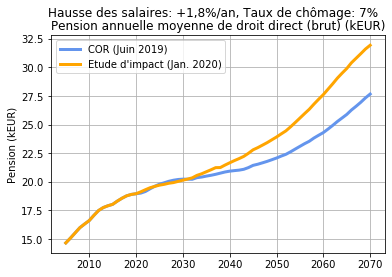

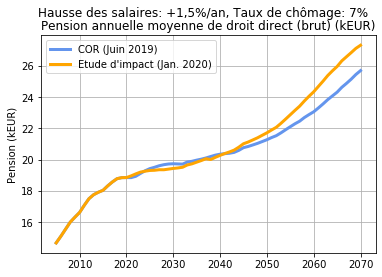

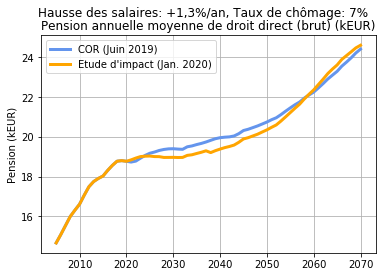

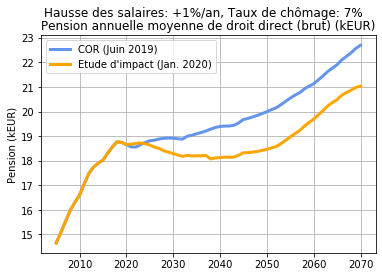

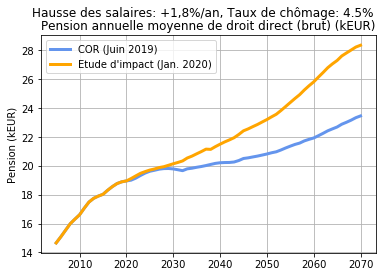

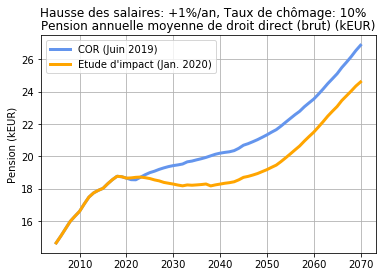

In [18]:
for s in simulateur.scenarios:
    pl.figure()
    titre = simulateur.scenarios_labels[s]
    pl.suptitle(titre)
    pl.title("Pension annuelle moyenne de droit direct (brut) (kEUR)")
    y = [pension_brut_COR[s][a] for a in analyse_EI.annees]
    pl.plot(analyse_EI.annees, y, label = "COR (Juin 2019)", \
            color = etudeImpact.couleur_HR, linewidth = etudeImpact.epaisseur_ligne)
    y = [pension_brut_EI[s][a] for a in analyse_EI.annees]
    pl.plot(analyse_EI.annees, y, label = "Etude d'impact (Jan. 2020)", 
            color = etudeImpact.couleur_SUR, linewidth = etudeImpact.epaisseur_ligne)
    pl.ylabel("Pension (kEUR)")
    pl.grid()
    pl.legend();
    filename = "../Article4/Simulation-pension-annuelle-moyenne-%d" % (s)
    pl.savefig(filename + ".pdf")

## Comparaison entre l'étude d'impact simulée et l'étude d'impact du gouvernement

On souhaite comparer les montants de pension annuelle de droit direct simulées et celles présentées dans l'étude d'impact. 

Pour cela, nous utilisons deux sources d'information issues de l'étude d'impact  de Janvier 2020.
* Le graphique 59 page 176 présente la pension annuelle de droit direct moyenne hors réforme et dans le système universel. Il couvre les années de naissance de 1975 à 1990.
* Le graphique 73 page 199 de l’étude d’impact présente l'âge moyen à la liquidation par génération. Il couvre les années de naissance de 1975 à 2000.

Dans l'étude d'impact, l'ensemble des personnes nées la même année est nommée "génération". 

Deux difficultés se présentent.
* Le graphique 59 ne présente la pension en fonction de l'année de départ à la retraite, mais en fonction de l'année de naissance.  
* L'horizon temporel est différent entre les graphiques : celui du graphique 59 est plus réduit. 

![Graphique 59](../Figures-Etude-Impact/EtudeImpact-Graphique-59-PensionAnnuelle.png)

C'est pourquoi on ne peut pas utiliser les données du graphique 59 pour comparer les pensions par génération et les pensions moyennes. En effet, pour une année donnée, la pension moyenne inclut des retraitées de différentes générations. Par exemple, les générations en retraite en 2060 en moyenne sont les générations 1970 à 1996. Il n'est donc pas possible de comparer le graphique 59 à celui que nous avons créé. 